# Facial Expressions Recognition using Convolutional Neural Network (CNN)

In [2]:
#Importing required libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:4

In [3]:
#Creating a function to read images from the folders and return preprocessed Images and their Labels
def load_images(Folders, faceCascade):
    images = []
    labels = []
    for folder in os.listdir(Folders):
        file = os.path.join(Folders, folder)
        for filename in os.listdir(file):
            img = cv2.imread(os.path.join(file, filename))
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            face = faceCascade.detectMultiScale(gray_img)
            for (x, y, w, h) in face:
                crop = gray_img[y:y+h, x:x+w]
                img = cv2.resize(crop, (200, 200))
            if img is not None:
                images.append(img)
                labels.append(folder)
    return images, labels

In [4]:
faceCascade = cv2.CascadeClassifier('file path where you have haarcascade_frontalface_default.xml file')

In [5]:
#Read JAFFE dataset images from folders
Jaffe = 'Jaffe dataset folder path'
Img_J, Lab_J = load_images(Jaffe, faceCascade)

In [6]:
#Read CK+ dataset images from folders
Ck = 'Ck+ dataset folder path'
Img_C, Lab_C = load_images(Ck, faceCascade)

In [7]:
#Changing the dimension of images to (200,200,1)
images_jaffe = (np.array(Img_J)/255.0).reshape(-1,200,200,1)
images_ck = (np.array(Img_C)/255.0).reshape(-1,200,200,1)

In [8]:
#Encode the Labels
targets_jaffe = LabelEncoder().fit_transform(np.array(Lab_J).reshape(-1,1))
targets_ck = LabelEncoder().fit_transform(np.array(Lab_C).reshape(-1,1))

C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [9]:
#Splitting the images as training and testing
train_img_J, test_img_J, train_lab_J, test_lab_J = train_test_split(images_jaffe, targets_jaffe, test_size = 0.25)
train_img_C, test_img_C, train_lab_C, test_lab_C = train_test_split(images_ck, targets_ck, test_size = 0.25)

## Evaluating the CNN model's performance for JAFFE dataset

In [26]:
#Creating the CNN model for Jaffe dataset
model_jaffe = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape = (200, 200, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'sigmoid'),
    tf.keras.layers.Dense(7, activation = 'softmax')
])

model_jaffe.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
#Running the model for Jaffe Dataset
results_jaffe = model_jaffe.fit(train_img_J, train_lab_J, epochs = 20, batch_size = 18, validation_data = (test_img_J, test_lab_J))

Train on 159 samples, validate on 54 samples
Epoch 1/20
159/159 [==============================] - 30s - loss: 2.0373 - acc: 0.1132 - val_loss: 1.9892 - val_acc: 0.1667
Epoch 2/20
159/159 [==============================] - 22s - loss: 1.9500 - acc: 0.2013 - val_loss: 1.9530 - val_acc: 0.1111
Epoch 3/20
159/159 [==============================] - 24s - loss: 1.9382 - acc: 0.1950 - val_loss: 1.9367 - val_acc: 0.1296
Epoch 4/20
159/159 [==============================] - 24s - loss: 1.7692 - acc: 0.3333 - val_loss: 1.7171 - val_acc: 0.4444
Epoch 5/20
159/159 [==============================] - 21s - loss: 1.5118 - acc: 0.4843 - val_loss: 1.5266 - val_acc: 0.4815
Epoch 6/20
159/159 [==============================] - 20s - loss: 1.1347 - acc: 0.5975 - val_loss: 1.3164 - val_acc: 0.5926
Epoch 7/20
159/159 [==============================] - 22s - loss: 0.9669 - acc: 0.6855 - val_loss: 1.2224 - val_acc: 0.5556
Epoch 8/20
159/159 [==============================] - 19s - loss: 0.7489 - acc: 0.8113 

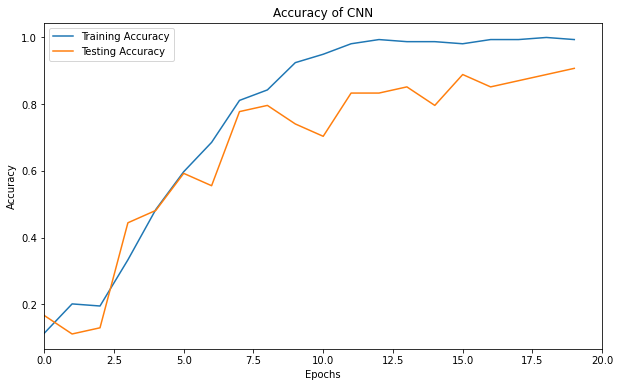

In [31]:
#Visualizing the Accuracy of CNN for Jaffe Dataset
plt.figure(figsize = (10, 6))
plt.plot(results_jaffe.history['acc'], label ='Training Accuracy')
plt.plot(results_jaffe.history['val_acc'], label = 'Testing Accuracy')
plt.title("Accuracy of CNN")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([0, 20])
plt.legend(loc = 'upper left')
plt.show()

## Evaluating the CNN model's performance for CK+ dataset

In [29]:
#Creating the CNN model for CK+ dataset
model_ck = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape = (200, 200, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'sigmoid'),
    tf.keras.layers.Dense(7, activation = 'softmax')
])

model_ck.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
#Run the model for CK+ Dataset
results_ck = model_ck.fit(train_img_C, train_lab_C, epochs = 20, batch_size = 50, validation_data = (test_img_C, test_lab_C))

Train on 818 samples, validate on 273 samples
Epoch 1/20
818/818 [==============================] - 193s - loss: 1.9398 - acc: 0.1760 - val_loss: 1.9702 - val_acc: 0.1648
Epoch 2/20
818/818 [==============================] - 121s - loss: 1.8899 - acc: 0.2543 - val_loss: 1.9209 - val_acc: 0.1795
Epoch 3/20
818/818 [==============================] - 124s - loss: 1.6219 - acc: 0.3900 - val_loss: 1.3690 - val_acc: 0.5348
Epoch 4/20
818/818 [==============================] - 128s - loss: 1.0496 - acc: 0.6443 - val_loss: 1.0987 - val_acc: 0.5971
Epoch 5/20
818/818 [==============================] - 135s - loss: 0.7720 - acc: 0.7592 - val_loss: 0.9015 - val_acc: 0.7143
Epoch 6/20
818/818 [==============================] - 128s - loss: 0.5871 - acc: 0.8374 - val_loss: 0.7736 - val_acc: 0.7656
Epoch 7/20
818/818 [==============================] - 121s - loss: 0.4488 - acc: 0.8888 - val_loss: 0.6514 - val_acc: 0.8388
Epoch 8/20
818/818 [==============================] - 121s - loss: 0.3700 - acc

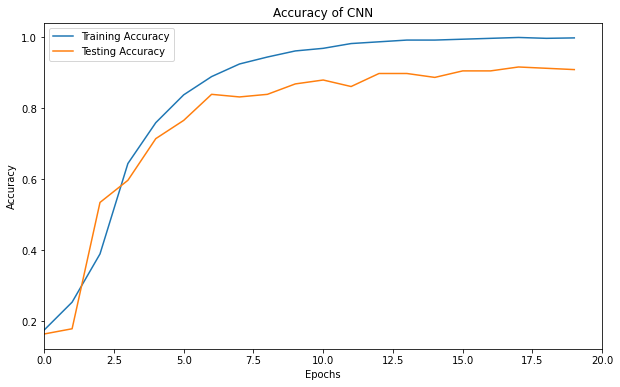

In [32]:
#Visualizing the Accuracy of CNN for CK+ Dataset
plt.figure(figsize = (10, 6))
plt.plot(results_ck.history['acc'], label ='Training Accuracy')
plt.plot(results_ck.history['val_acc'], label = 'Testing Accuracy')
plt.title("Accuracy of CNN")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([0, 20])
plt.legend(loc = 'upper left')
plt.show()

## Visualizing the output images of 1st and 5th layers of CNN

In [33]:
#For visualizing the output images of each layer of the CNN
layer_outputs = [layer.output for layer in model_jaffe.layers[:10]]
activation_model = tf.keras.models.Model(inputs=model_jaffe.input, outputs=layer_outputs)
activations = activation_model.predict(images_jaffe[0].reshape(-1, 200, 200, 1))

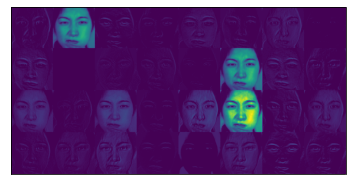

In [34]:
#Showing the output images of First layer
first_layer = activations[0]

Seq1_1 = np.concatenate([first_layer[0,:,:,k] for k in range (0,8)], axis = 1)
Seq1_2 = np.concatenate([first_layer[0,:,:,k] for k in range (8,16)], axis = 1)
Seq1_3 = np.concatenate([first_layer[0,:,:,k] for k in range (16,24)], axis = 1)
Seq1_4 = np.concatenate([first_layer[0,:,:,k] for k in range (24,32)], axis = 1)

Seq1 = np.concatenate((Seq1_1, Seq1_2, Seq1_3, Seq1_4), axis = 0)

plt.figure(figsize=(6,6))
plt.imshow(Seq1, cmap = 'viridis')
plt.xticks([])
plt.yticks([])
plt.show()

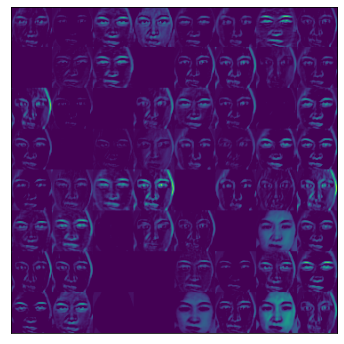

In [35]:
#Showing the output images of Fifth layer
fifth_layer = activations[4]

Seq5_1 = np.concatenate([fifth_layer[0,:,:,k] for k in range (0,8)], axis = 1)
Seq5_2 = np.concatenate([fifth_layer[0,:,:,k] for k in range (8,16)], axis = 1)
Seq5_3 = np.concatenate([fifth_layer[0,:,:,k] for k in range (16,24)], axis = 1)
Seq5_4 = np.concatenate([fifth_layer[0,:,:,k] for k in range (24,32)], axis = 1)
Seq5_5 = np.concatenate([fifth_layer[0,:,:,k] for k in range (32,40)], axis = 1)
Seq5_6 = np.concatenate([fifth_layer[0,:,:,k] for k in range (40,48)], axis = 1)
Seq5_7 = np.concatenate([fifth_layer[0,:,:,k] for k in range (48,56)], axis = 1)
Seq5_8 = np.concatenate([fifth_layer[0,:,:,k] for k in range (56,64)], axis = 1)

Seq5 = np.concatenate((Seq5_1, Seq5_2, Seq5_3, Seq5_4, Seq5_5, Seq5_6, Seq5_7, Seq5_8), axis = 0)

plt.figure(figsize=(6,6))
plt.imshow(Seq5, cmap = 'viridis')
plt.xticks([])
plt.yticks([])
plt.show()